<a href="https://colab.research.google.com/github/Victor0vich/Denis/blob/main/AI_ML_14Jul2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в машинное обучение

Мы будем работать с датасетом про отток клиентов телекома - в нем содержатся различные характеристики клиентов и информация об оттоке.

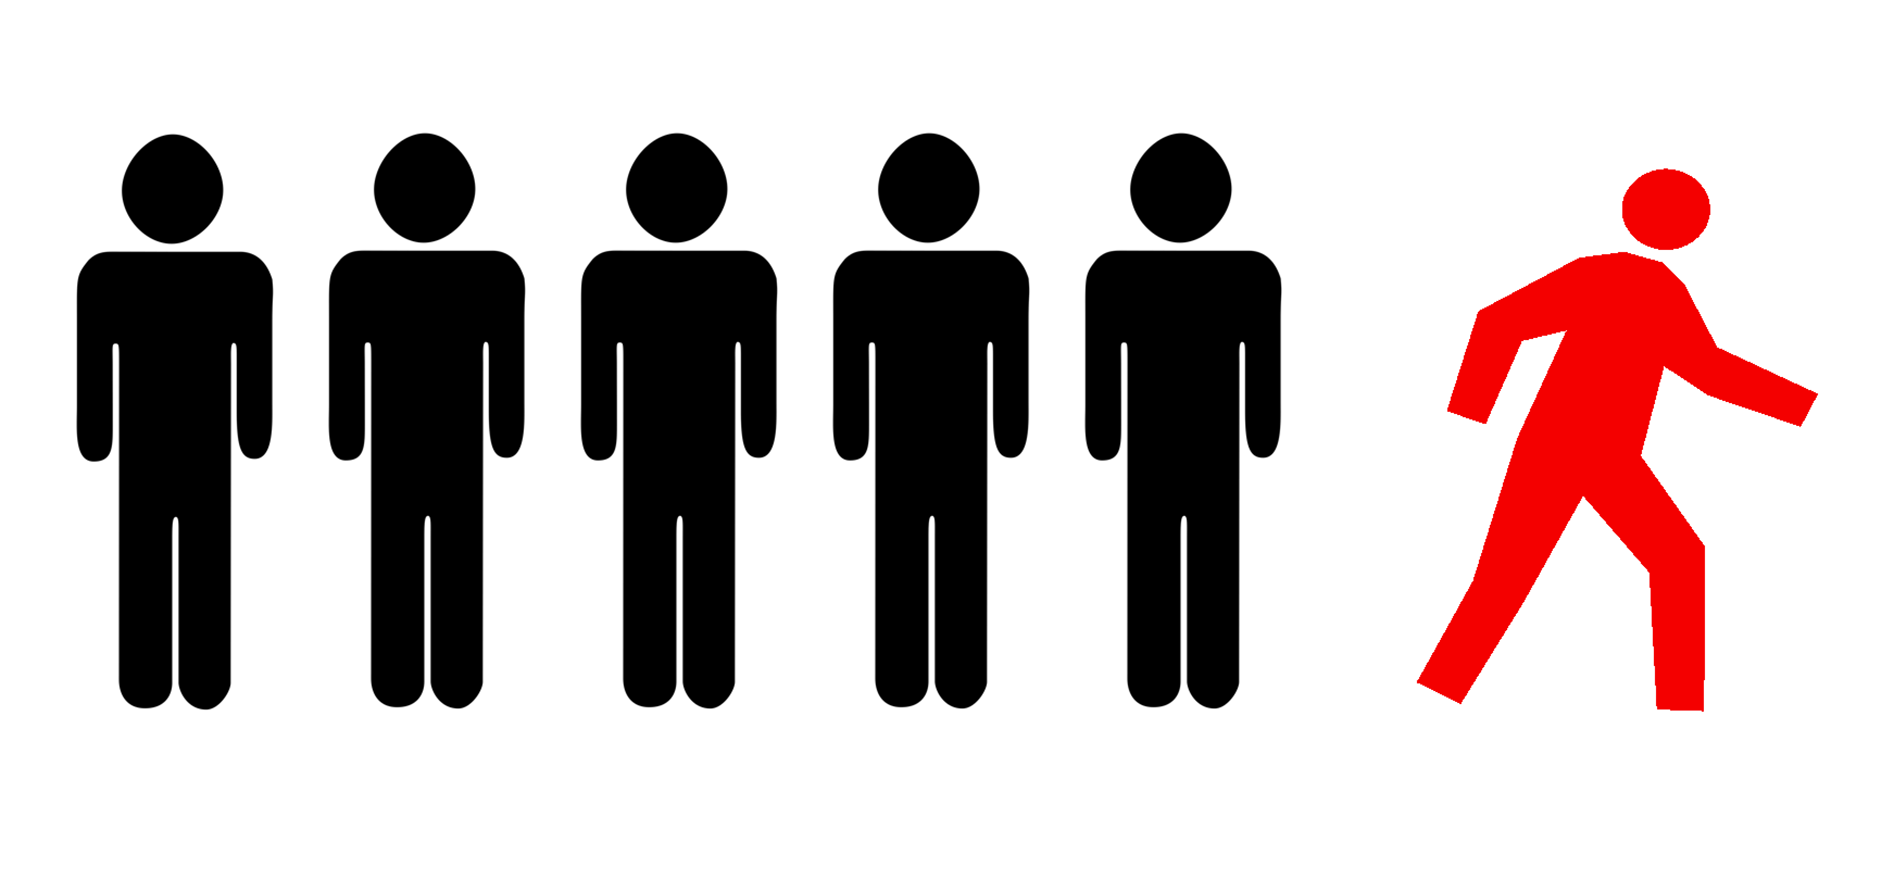

**Цели на сегодня:**

* Изучить данные

* Получить быструю аналитику

* Освоить основы Machine Learning

* Построить модель, оценить ее и проинтерпретировать. Улучшить модель

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

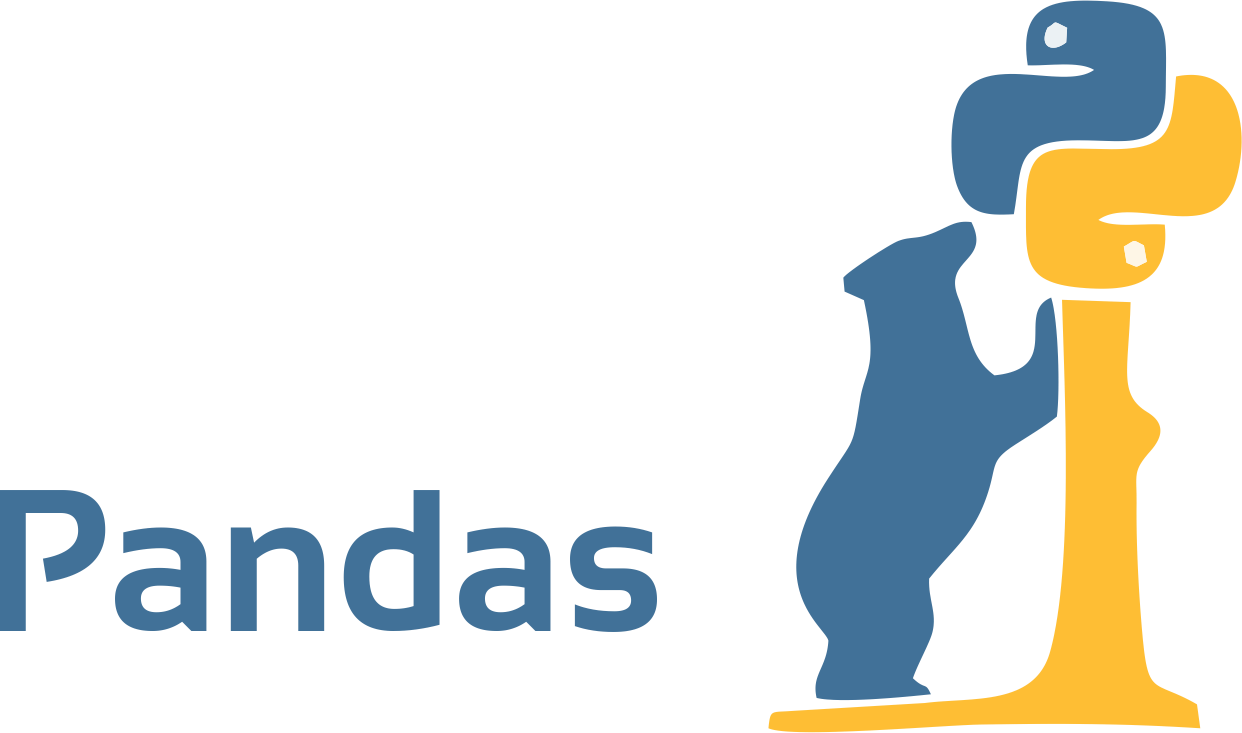

In [ ]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/CustomerChurn.csv"

In [ ]:
df = pd.read_csv(DATASET)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Описание данных

* `gender` - Whether the customer is a male or a female

* `SeniorCitizen` - Whether the customer is a senior citizen or not (1, 0)

* `Partner` - Whether the customer has a partner or not (Yes, No)

* `Dependents` - Whether the customer has dependents or not (Yes, No)

* `tenure` - Number of months the customer has stayed with the company

* `PhoneService` - Whether the customer has a phone service or not (Yes, No)

* `MultipleLines` - Whether the customer has multiple lines or not (Yes, No, No phone service)

* `InternetService` - Customer’s internet service provider (DSL, Fiber optic, No)

* `OnlineSecurity` - Whether the customer has online security or not (Yes, No, No internet service)

* `OnlineBackup` - Whether the customer has online backup or not (Yes, No, No internet service)

* `DeviceProtection` - Whether the customer has device protection or not (Yes, No, No internet service)

* `TechSupport` - Whether the customer has tech support or not (Yes, No, No internet service)

* `StreamingTV` - Whether the customer has streaming TV or not (Yes, No, No internet service)

* `StreamingMovies` - Whether the customer has streaming movies or not (Yes, No, No internet service)

* `Contract` - The contract term of the customer (Month-to-month, One year, Two year)

* `PaperlessBilling` - Whether the customer has paperless billing or not (Yes, No)

* `PaymentMethod` - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card

* `MonthlyCharges` - The amount charged to the customer monthly

* `TotalCharges` - The total amount charged to the customer

* `Churn` - Whether the customer churned or not (Yes or No)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1546,7114-AEOZE,Female,0,No,No,60,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1128.1,No
931,0454-OKRCT,Male,0,No,No,33,Yes,No,Fiber optic,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),80.60,2651.1,No
187,8167-GJLRN,Male,0,No,No,3,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,30.40,82.15,No
414,1996-DBMUS,Female,1,Yes,No,48,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.65,3545.05,No
3717,0655-YDGFJ,Male,0,No,No,29,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),48.95,1323.7,No
6693,7895-VONWT,Female,0,No,No,25,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,48.25,1293.8,No
5193,7096-ZNBZI,Female,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),26.45,1914.5,No
1011,6614-YOLAC,Female,0,Yes,Yes,71,No,No phone service,DSL,Yes,...,No,Yes,Yes,Yes,Two year,No,Mailed check,58.65,4145.25,No
3768,3537-HPKQT,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.4,No
2318,6463-HHXJR,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,No,Bank transfer (automatic),100.50,7030.65,No


## Исследование данных

Размер датасета

In [ ]:
df.shape

(7043, 21)

Информация о типах данных и пропусках

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Основные числовые характеристики

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## Изменение типов признаков

Поработаем с TotalCharges

In [ ]:
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [ ]:
df[df.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Клиенты с пустыми TotalCharges - новые клиенты, по ним еще не закрывали счета. Имеет смысл заменить для этих клиентов TotalCharges на 0.

In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: 0 if x == ' ' else float(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Посмотрим есть ли дубли в данных

In [ ]:
df.duplicated().sum()

0

# Аналитика

## Дашборды (или аналитика в одну строчку)

## Pandas profiling

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

  Preparing metadata (setup.py) ... done


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile_report = ProfileReport(df, title='Pandas Profiling Report')

In [ ]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile_report.to_file('ChurnClients_report.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Sweetviz

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

# Create an analysis report for your data
report = sv.analyze(df)

# Display the report
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Введение в машинное обучение

Основные понятия.

В нашем примере мы можем попробовать предсказать отток клиентов (Churn) по их характеристикам.

* Клиенты - *объекты*
* Характеристики клиентов - *признаки*
* Факт оттока / не оттока - *целевая переменная*

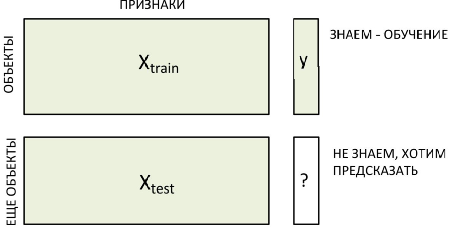

## Модели для прогноза

Модели - это различные математические функции (правила), по которым можно сделать прогноз, то есть предсказать значение целевой переменной.

В этом ноутбуке для прогнозирования будем использовать **решающие деревья**.

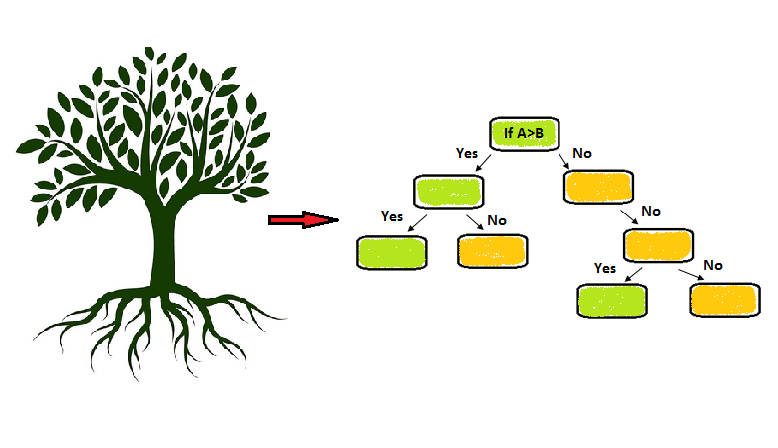

## Подготовка данных

In [ ]:
df = pd.read_csv(DATASET)

df['TotalCharges'] = df['TotalCharges'].apply(lambda x: 0 if x == ' ' else float(x))

df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:
df['gender'] = df['gender'].map({'Male' : 1, 'Female' : 0})
df['Partner'] = df['Partner'].map({'Yes' : 1, 'No' : 0})
df['Dependents'] = df['Dependents'].map({'Yes' : 1, 'No' : 0})
df['PhoneService'] = df['PhoneService'].map({'Yes' : 1, 'No' : 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes' : 1, 'No' : 0})
df['Churn'] = df['Churn'].map({'Yes' : 1, 'No' : 0})

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df_numeric = df.select_dtypes(include='number')

df_numeric.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,29.85,29.85,0
1,1,0,0,0,34,1,0,56.95,1889.50,0
2,1,0,0,0,2,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,1,70.70,151.65,1


Сформируем матрицу объект-признак и вектор с целевой переменной.

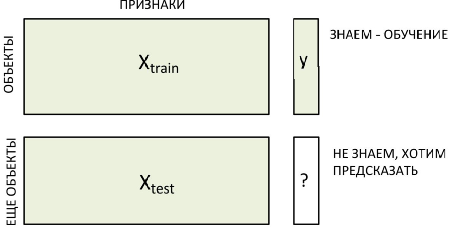

In [ ]:
X = df_numeric.drop('Churn', axis=1)
y = df_numeric['Churn']

## Обучение и применение модели

Обучение модели

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

Прогнозирование

In [ ]:
pred = model.predict(X)

pred[:10]

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0])

## Валидация модели

Мы не можем оценить насколько хорошо модель делает прогноз на новых для нее данных, поэтому для корректной оценки качества нам необходима *отложенная выборка*.

Разобъем данные на train и test, чтобы:
* на тренировочных данных обучить модель
* на тестовых (отложенная выборка) применить обученную модель и затем проверить качество модели

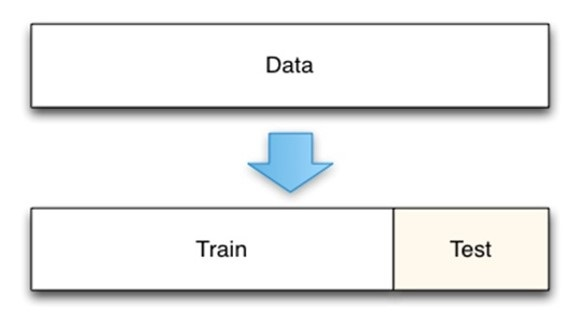

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((5282, 9), (1761, 9))

In [ ]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
model.tree_.max_depth

30

## Измерение качества модели

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, pred_train)

0.9971601666035592

In [ ]:
accuracy_score(y_test, pred_test)

0.7143668370244179

## Переобучение

Наша модель работает на тестовых данных гораздо хуже, чем на обучающих, при этом на обучающих - почти идеально. Что же произошло?

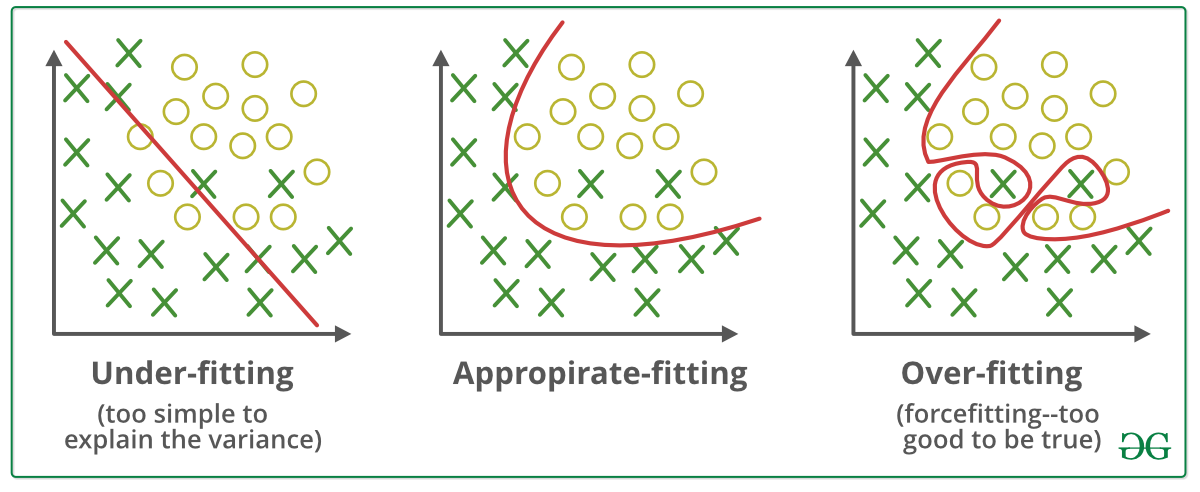

Эта ситуация называется переобучением (overfitting). При переобучении модель не выучивает зависимости в данных, то есть не решает нашу задачу - а просто *запоминает* обучающие данные.

К переобучению склонны сложные модели.

Давайте упростим модель, ограничив глубину дерева.

In [ ]:
model = DecisionTreeClassifier(max_depth = 3)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
accuracy_score(y_train, pred_train)

0.7862552063612268

In [ ]:
accuracy_score(y_test, pred_test)

0.778534923339012

### Прогноз вероятностей

* Модели классификации почти всегда умеют предсказывать вероятности классов, а не только классы

* Самая известная и надежная метрика, оценивающая качество модели относительно спрогнозированных вероятностей - это ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)[:,1]

roc_auc_score(y_test, probs)

0.7956106553239166

## Визуализация модели (дерева)

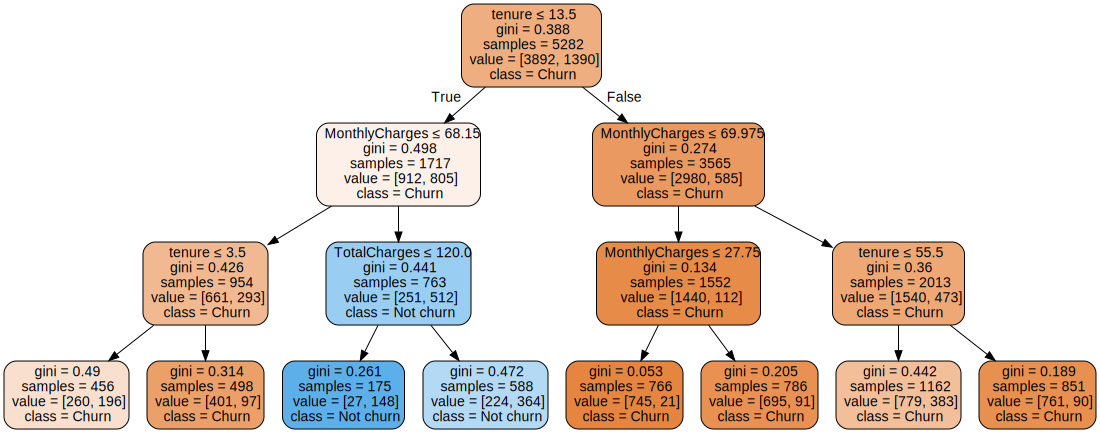

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(model,
                  feature_names=X.columns,
                  class_names=['Churn', 'Not churn'],
                  filled=True, rounded=True,
                  special_characters=True,
                  out_file=None,
                           )

graph = graphviz.Source(dot_data)
graph

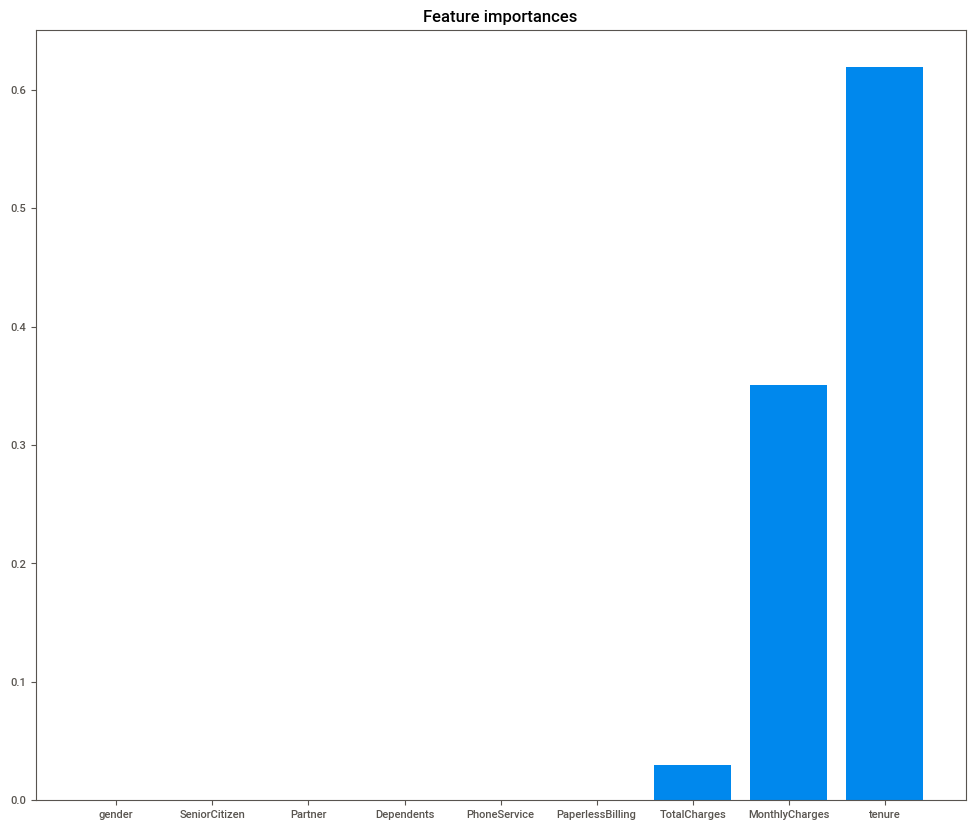

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title("Feature importances")
plt.bar(range(len(model.feature_importances_)), model.feature_importances_[indices])
plt.xticks(range(len(model.feature_importances_)), X_train.columns[indices])
plt.show()

## Улучшение модели

In [ ]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [ ]:
df['Contract'] = df['Contract'].map({'Month-to-month' : 1, 'One year' : 2, 'Two year' : 3})

In [ ]:
X_big = df.select_dtypes(include='number').drop('Churn', axis=1)
y_big = df_numeric['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_big, y_big, test_size=0.25, random_state=42)

In [ ]:
model = DecisionTreeClassifier(max_depth = 6)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.8053767512305945, 0.7927314026121521)

In [ ]:
probs = model.predict_proba(X_test)[:,1]

roc_auc_score(y_test, probs)

0.8262191447991949

In [ ]:
dot_data = tree.export_graphviz(model,
                  feature_names=X_train.columns,
                  class_names=['Churn', 'Not churn'],
                  filled=True, rounded=True,
                  special_characters=True,
                  out_file=None,
                           )

graph = graphviz.Source(dot_data)
graph

## Оценка важности признаков

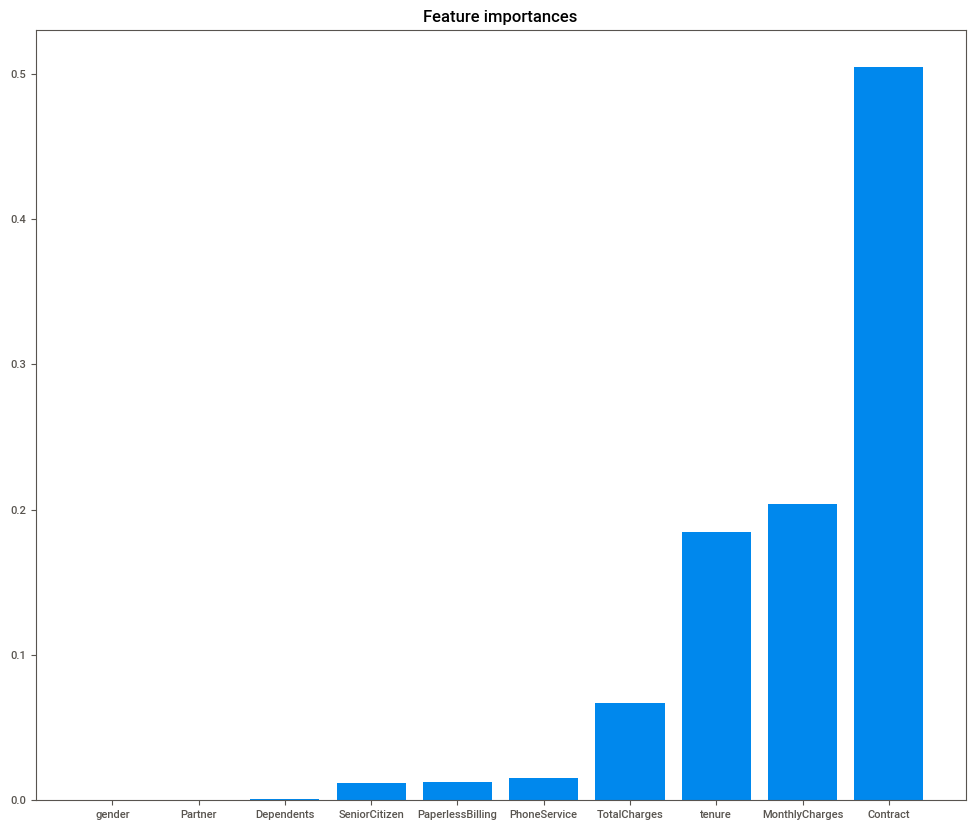

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title("Feature importances")
plt.bar(range(len(model.feature_importances_)), model.feature_importances_[indices])
plt.xticks(range(len(model.feature_importances_)), X_train.columns[indices])
plt.show()